# Project Name: extract numbers inside boxes from an image using Python/ML

Contributor: Rajeev Singh Sisodiya

Project Details: This project aims to develop a Python-based solution leveraging machine learning techniques to accurately extract and recognize numbers within boxed areas in images. By using libraries such as OpenCV for image processing and Tesseract for Optical Character Recognition (OCR), the solution will automate the extraction of numerical data from images, such as layout maps, forms, or diagrams.
# Key Features:
# Image Preprocessing:
Enhance the quality of the input image to improve OCR accuracy through techniques such as grayscale conversion, noise reduction, and thresholding.
# Contour Detection:
Identify and isolate boxed areas within the image using contour detection methods.
# Optical Character Recognition:
Extract and recognize numbers from the isolated boxes using Tesseract OCR.
#Data Validation and Post-processing:
Validate the extracted numbers and correct any OCR errors to ensure accuracy.
#User Interface:
Provide a user-friendly interface for uploading images and viewing results (optional, depending on scope).
#Project Phases
#Requirement Gathering
Understand specific needs and expectations from the client.
Collect sample images and any relevant data to guide development.
#Design and Planning
Define the architecture of the solution.
Plan the preprocessing, OCR, and post-processing steps in detail.
Decide on the tools and libraries to be used.
Implementation
# Image Preprocessing:
Write scripts to convert images to grayscale, reduce noise, and apply thresholding.
# Contour Detection:
Implement methods to detect and extract boxed areas from the image.
OCR Integration: Use Tesseract to recognize and extract numbers from the identified boxes.
#Post-processing:
Implement validation steps to correct OCR errors and ensure the accuracy of the extracted numbers.
Testing
Test the solution with various sample images to ensure robustness and accuracy.
Fine-tune parameters and algorithms based on test results.
Deployment
# Deploy the solution on the chosen platform.
Provide documentation and training to the client for effective use.
# Maintenance and Support
Offer ongoing support to address any issues and improve the solution based on client feedback.
# Technology Stack
# Programming Language:
# Python Libraries:
OpenCV, pytesseract, numpy, matplotlib (for visualization)
Optional Tools: Flask or Django for a web-based interface
Deliverables
#Python Scripts:
Complete scripts for image preprocessing, contour detection, OCR, and post-processing.
Documentation: Comprehensive documentation detailing how to use and configure the solution.



In [ ]:
!pip install pytesseract opencv-python

In [ ]:
!pip install opencv-python pytesseract numpy


In [ ]:
!apt-get install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (8,992 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123588 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
!pip install pytesseract opencv-python numpy

In [ ]:


import cv2
import pytesseract
import numpy as np

# Path to the Tesseract executable (this might vary depending on your system)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'  # Update this path if necessary

# Load the image
image_path = '/content/kavanur.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize a list to store detected numbers
detected_numbers = []

# Iterate through the contours
for contour in contours:
    # Get the bounding box for the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Filter out small contours that may not be boxes
    if w > 30 and h > 15:  # Adjust these values based on your image's specifics
        # Draw a rectangle around the contour (optional, for visualization)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Extract the region of interest (ROI)
        roi = gray[y:y + h, x:x + w]

        # Use pytesseract to extract text from the ROI
        text = pytesseract.image_to_string(roi, config='--psm 8 -c tessedit_char_whitelist=0123456789')

        # Remove any non-digit characters and strip whitespace
        number = ''.join(filter(str.isdigit, text)).strip()

        # Append to the list of detected numbers if valid
        if number:
            detected_numbers.append(number)
            print(f"Detected Number: {number}")

# Display the final image with rectangles (optional)
# cv2.imshow('Detected Numbers', image) # This line will cause issues in a notebook environment
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Output the list of detected numbers
print("Detected Numbers: ", detected_numbers)

Detected Numbers:  []


In [ ]:
!pip install pytesseract opencv-python


Detected Number: 7
Detected Number: 5
Detected Number: 4
Detected Number: 2
Detected Number: 2
Detected Number: 2
Detected Number: 0
Detected Number: 4
Detected Number: 2
Detected Number: 2
Detected Number: 5
Detected Number: 2
Detected Number: 5
Detected Number: 4
Detected Number: 4


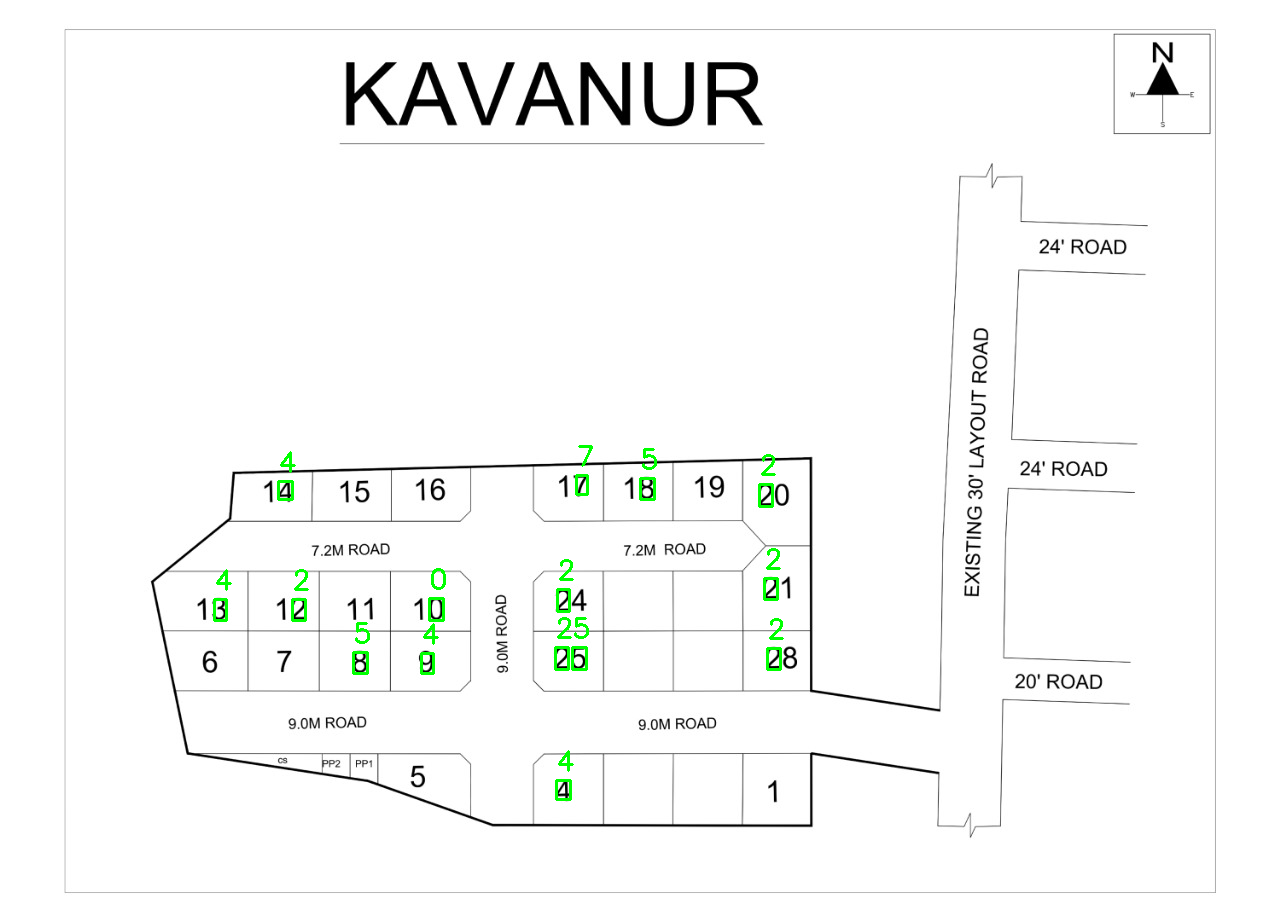

In [ ]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow # Import the alternative display function

# Path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'  # Update this path

# Load the image
image = cv2.imread('/content/kavanur.jpg')  # Update this path

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply some preprocessing
# Remove noise
gray = cv2.medianBlur(gray, 5)

# Apply threshold to get a binary image
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Find contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours from top to bottom, left to right (optional)
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[1] * binary.shape[1] + cv2.boundingRect(c)[0])

# Loop through the contours and extract numbers
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if 10 < w < 100 and 10 < h < 100:  # Filter out very small or very large boxes
        roi = gray[y:y+h, x:x+w]  # Region of interest
        # Use pytesseract to do OCR on the ROI
        custom_config = r'--oem 3 --psm 6 outputbase digits'
        text = pytesseract.image_to_string(roi, config=custom_config)
        text = text.strip()
        if text.isdigit():
            print(f"Detected Number: {text}")
            # Draw rectangle around the detected text and put the text
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)


# Replace cv2.imshow with cv2_imshow
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Detected Number: 5
Detected Number: 7
Detected Number: 2
Detected Number: 3
Detected Number: 4
Detected Number: 4
Detected Number: 4
Detected Number: 3
Detected Number: 2
Detected Number: 6
Detected Number: 3
Detected Number: 2
Detected Number: 2
Detected Number: 4
Detected Number: 2
Detected Number: 2
Detected Number: 4
Detected Number: 2
Detected Number: 2
Detected Number: 4
Detected Number: 2
Detected Number: 2
Detected Number: 2
Detected Number: 2
Detected Number: 5
Detected Number: 4
Detected Number: 4
Detected Number: 4
Detected Number: 4
Detected Number: 4
Detected Number: 5
Detected Number: 5
Detected Number: 4
Detected Number: 4
Detected Number: 4
Detected Number: 4
Detected Number: 4
Detected Number: 4
Detected Number: 4
Detected Number: 2
Detected Number: 0
Detected Number: 5
Detected Number: 5
Detected Number: 5
Detected Number: 5
Detected Number: 4
Detected Number: 4
Detected Number: 4
Detected Number: 4
Detected Number: 5
Detected Number: 5
Detected Number: 5
Detected Num

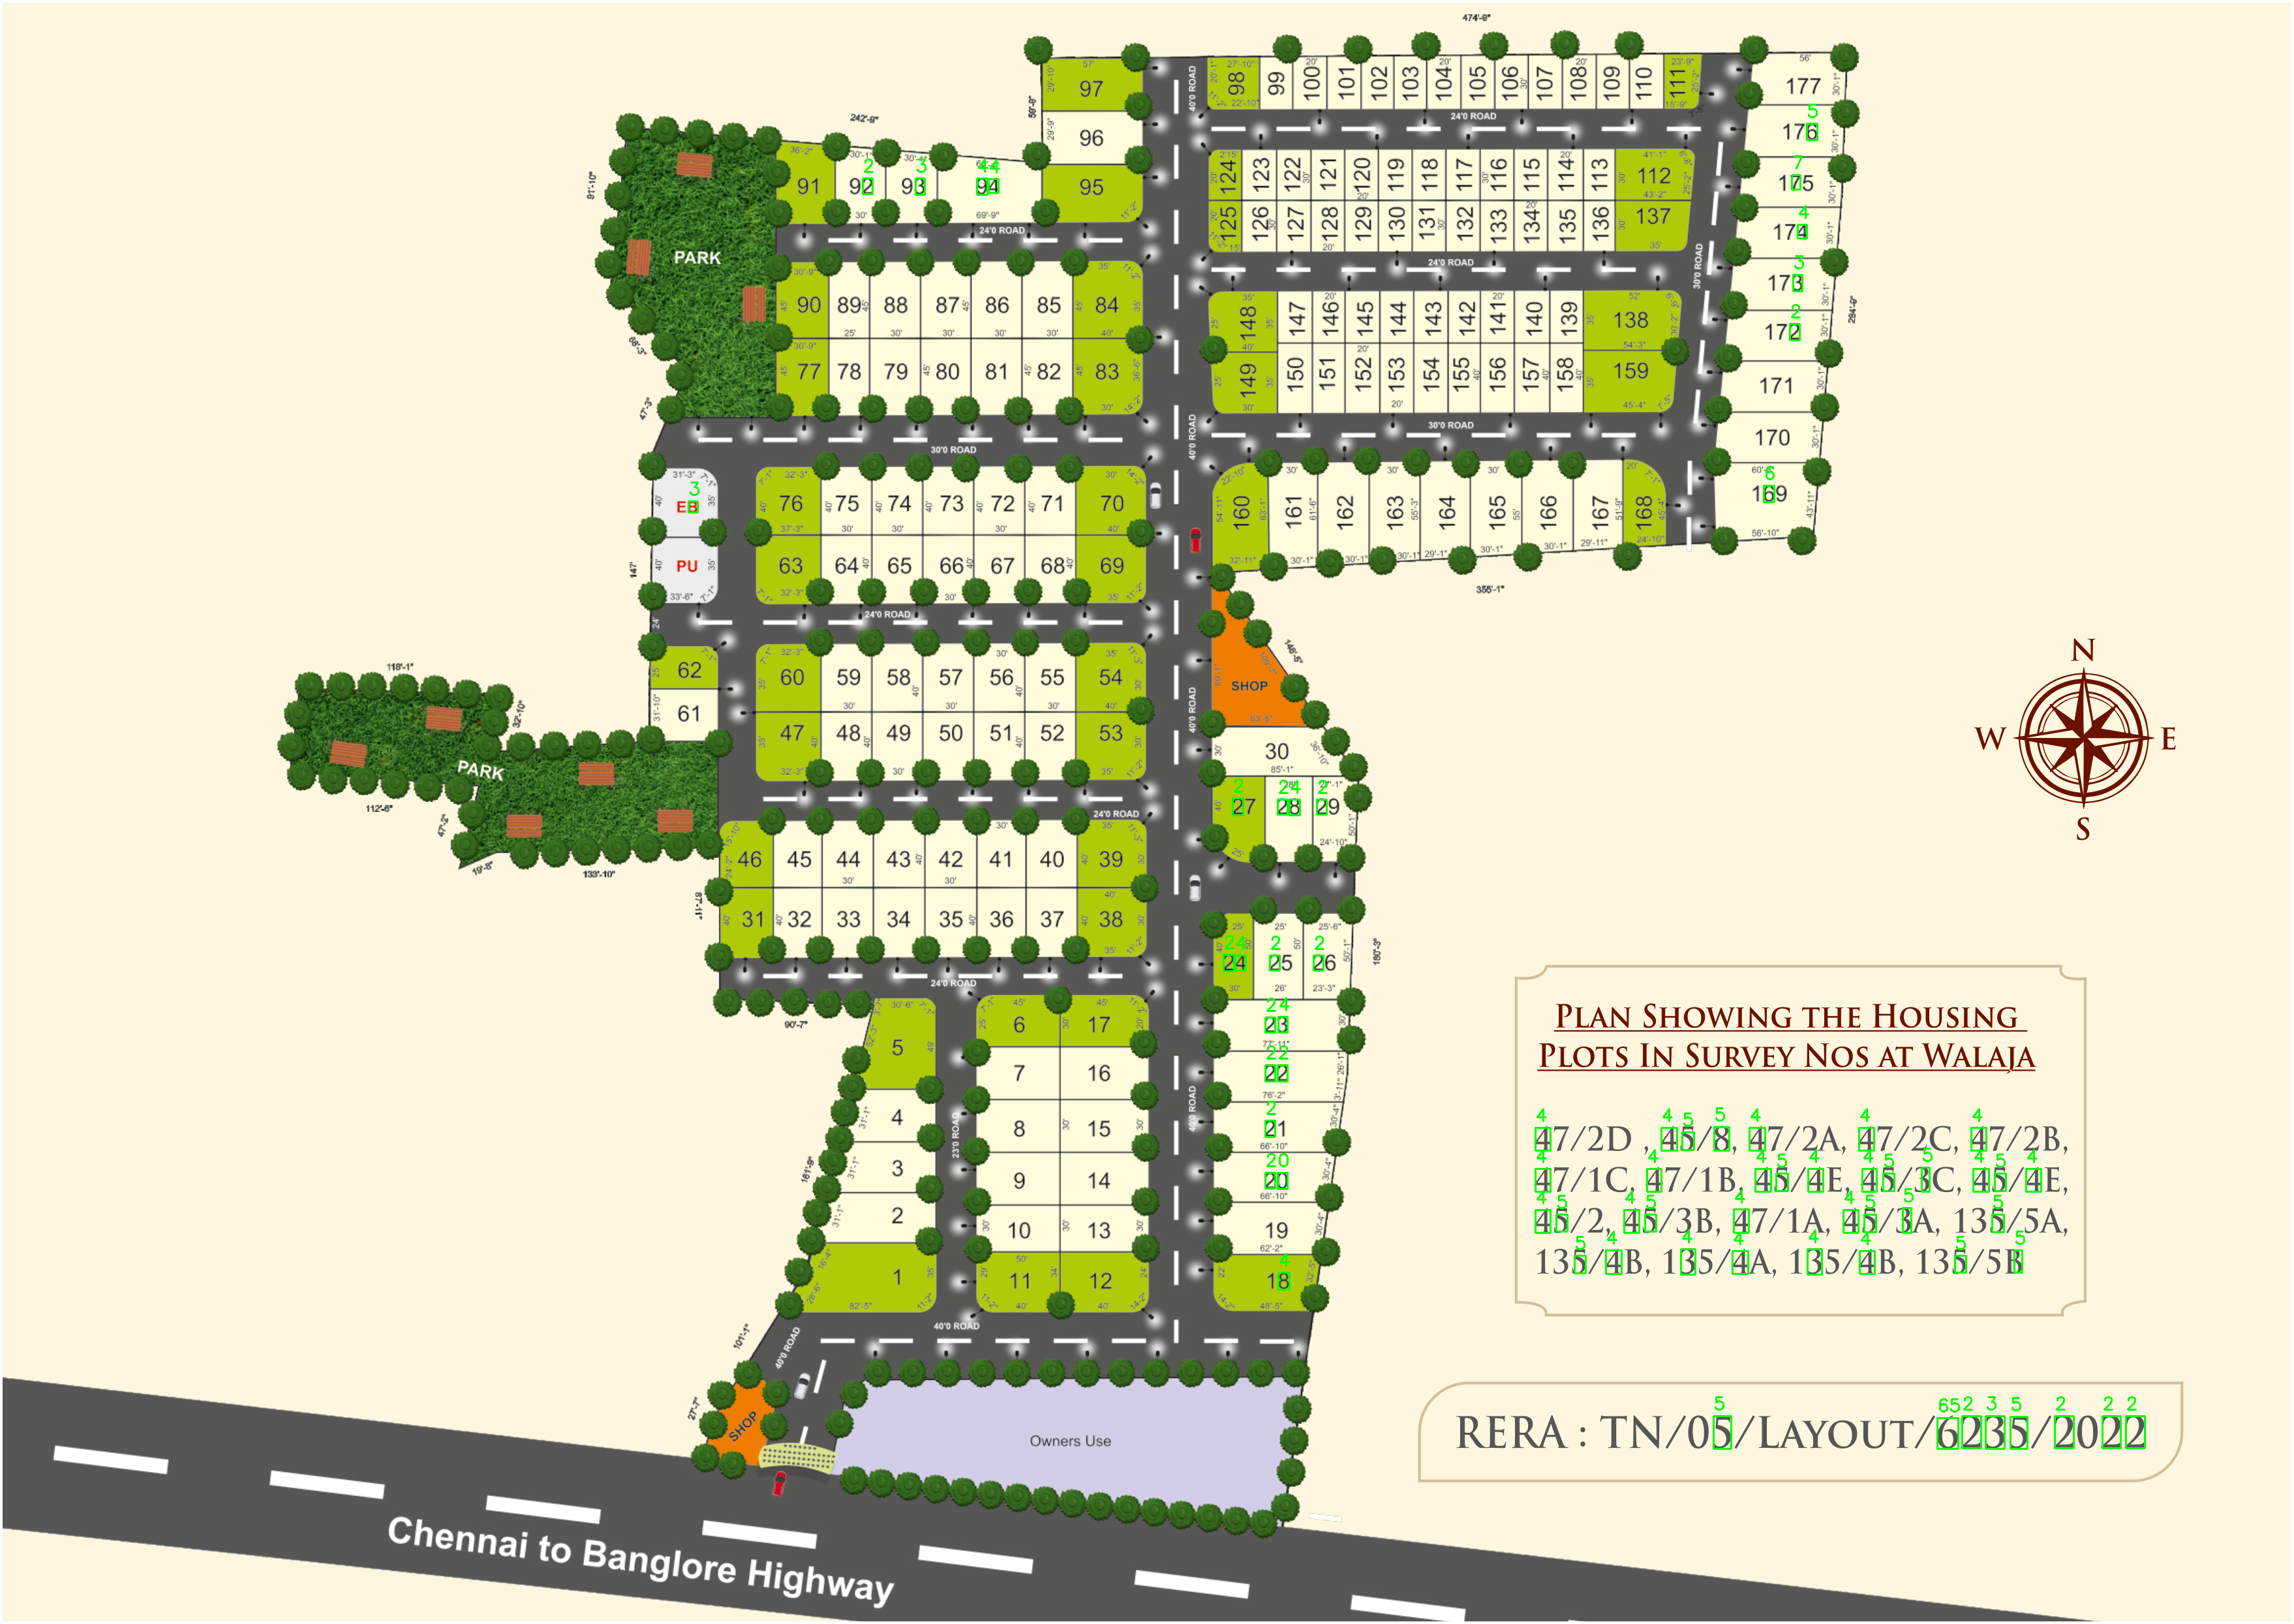

In [ ]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow # Import the alternative display function

# Path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'  # Update this path

# Load the image
image = cv2.imread('/content/master.png')  # Update this path

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply some preprocessing
# Remove noise
gray = cv2.medianBlur(gray, 5)

# Apply threshold to get a binary image
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Find contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours from top to bottom, left to right (optional)
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[1] * binary.shape[1] + cv2.boundingRect(c)[0])

# Loop through the contours and extract numbers
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if 10 < w < 100 and 10 < h < 100:  # Filter out very small or very large boxes
        roi = gray[y:y+h, x:x+w]  # Region of interest
        # Use pytesseract to do OCR on the ROI
        custom_config = r'--oem 3 --psm 6 outputbase digits'
        text = pytesseract.image_to_string(roi, config=custom_config)
        text = text.strip()
        if text.isdigit():
            print(f"Detected Number: {text}")
            # Draw rectangle around the detected text and put the text
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)


# Replace cv2.imshow with cv2_imshow
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Conclusion: This project will enable users to efficiently extract numerical data from boxed areas within images, facilitating various applications in document processing, urban planning, and more.